In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import nbinom
from distfit import distfit
import math
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv("plik7.csv")
data = data.drop(columns='Unnamed: 0')

In [49]:
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = data['rok'].value_counts()

#opcje = ['norm', 'pareto', 'dweibull', 'lognorm', 'uniform']
opcje = ['norm', 't', 'pareto', 'gamma', 'dweibull', 'lognorm', 'uniform']

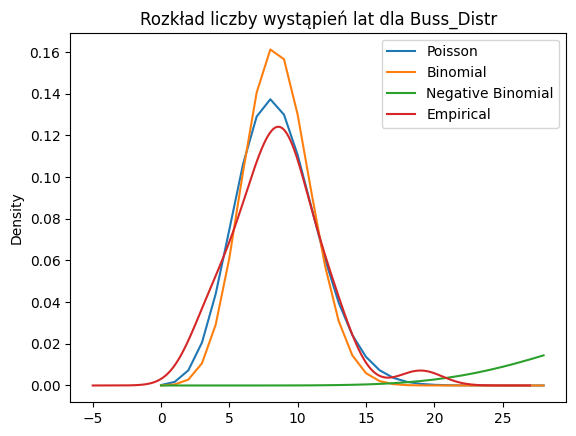

≈örednia dla Buss_Distr: 8.51
Wariancja dla Buss_Distr: 10.49
Odchylenie standardowe dla Buss_Distr: 3.24


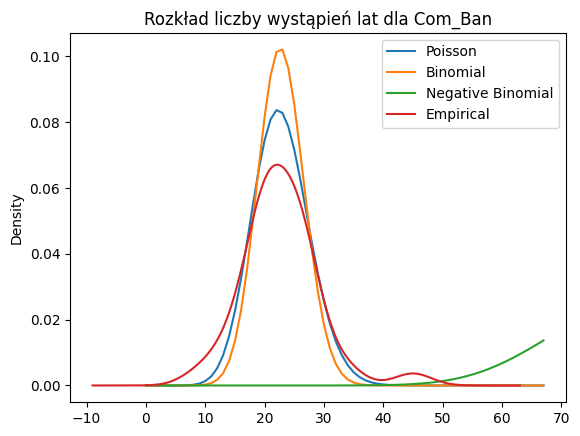

≈örednia dla Com_Ban: 22.77
Wariancja dla Com_Ban: 40.59
Odchylenie standardowe dla Com_Ban: 6.37


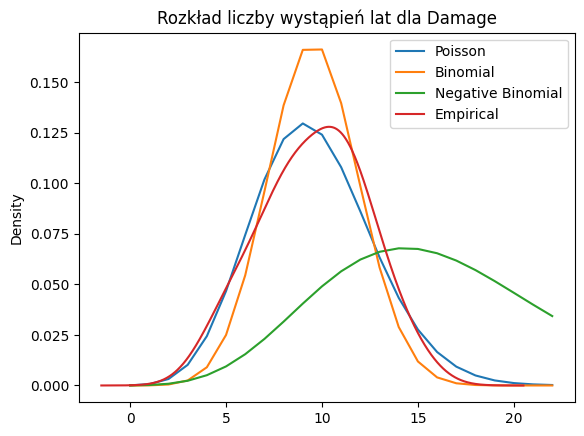

≈örednia dla Damage: 9.57
Wariancja dla Damage: 7.25
Odchylenie standardowe dla Damage: 2.69


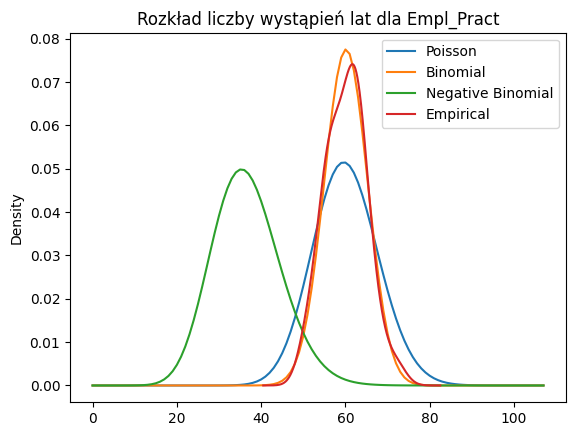

≈örednia dla Empl_Pract: 60.09
Wariancja dla Empl_Pract: 23.08
Odchylenie standardowe dla Empl_Pract: 4.80


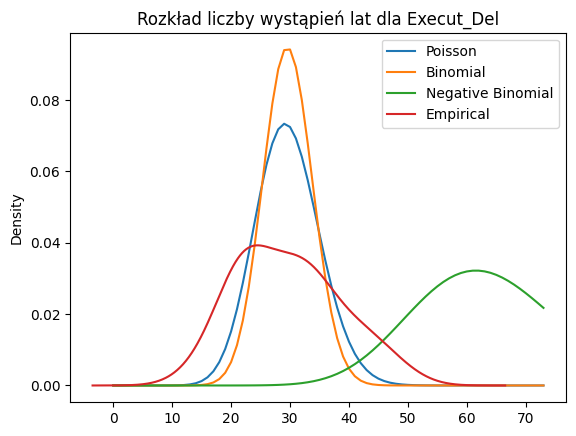

≈örednia dla Execut_Del: 29.63
Wariancja dla Execut_Del: 74.77
Odchylenie standardowe dla Execut_Del: 8.65


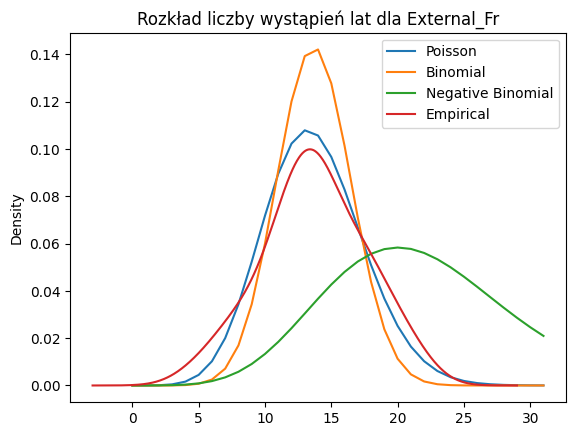

≈örednia dla External_Fr: 13.71
Wariancja dla External_Fr: 14.62
Odchylenie standardowe dla External_Fr: 3.82


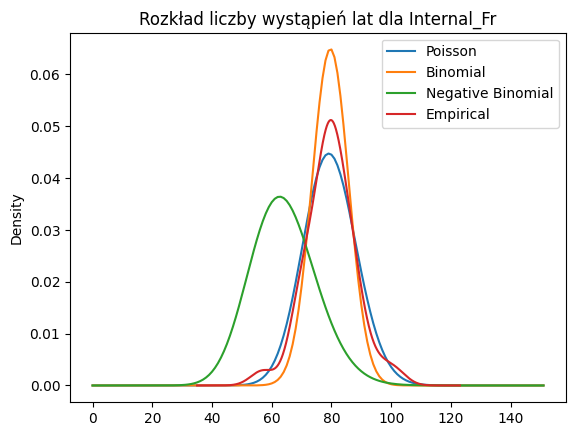

≈örednia dla Internal_Fr: 79.60
Wariancja dla Internal_Fr: 66.84
Odchylenie standardowe dla Internal_Fr: 8.18


In [50]:
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = linia_data['rok'].value_counts().sort_index()

    x = np.arange(0, max(year_counts)*1.5)
    plt.plot(x, poisson.pmf(x, year_counts.mean()), label='Poisson')

    n = max(x)
    p = year_counts.mean() / n
    plt.plot(x, binom.pmf(x, n, p), label='Binomial')
    
    r = year_counts.mean()*(1-p)/p
    plt.plot(x, nbinom.pmf(x, r, p), label='Negative Binomial')
    
    year_counts.plot(kind='kde', title=f'Rozk≈Çad liczby wystƒÖpie≈Ñ lat dla {linia}',
                    xlabel='Liczba', ylabel='Frequency', label="Empirical")
    plt.legend()
    plt.show()
    print("≈örednia dla {}: {:.2f}".format(linia,year_counts.mean()))
    print("Wariancja dla {}: {:.2f}".format(linia,year_counts.std()**2))
    print("Odchylenie standardowe dla {}: {:.2f}".format(linia,year_counts.std()))
    # dfit = distfit(method="discrete", distr="nbinom")
    # dfit.fit_transform(year_counts, verbose=False)
    # distr = dfit.model
    # print("Dopasowany rozk≈Çad dla {}: {}".format(linia,distr['name'])) 

≈örednia dla Buss_Distr: 28000.00
Odchylenie standardowe dla Buss_Distr: 26882.76
Dopasowany rozk≈Çad dla Buss_Distr: expon


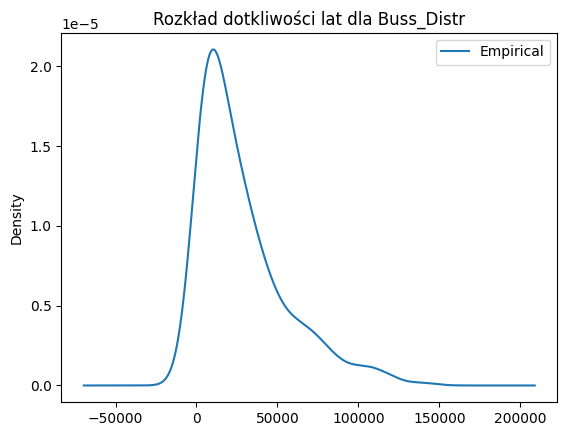

≈örednia dla Com_Ban: 37000.00
Odchylenie standardowe dla Com_Ban: 39502.69
Dopasowany rozk≈Çad dla Com_Ban: beta


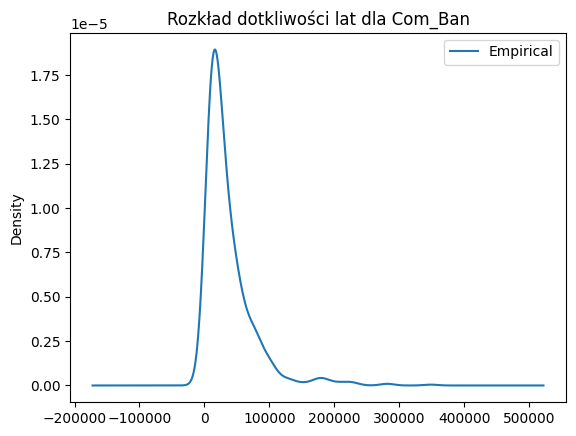

≈örednia dla Damage: 5004.57
Odchylenie standardowe dla Damage: 28220.88
Dopasowany rozk≈Çad dla Damage: pareto


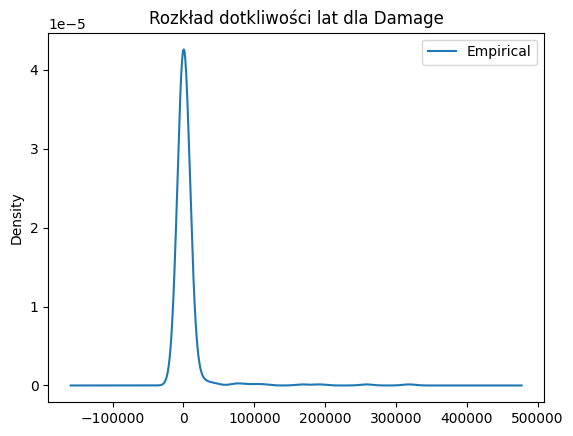

≈örednia dla Empl_Pract: 23000.00
Odchylenie standardowe dla Empl_Pract: 4503.38
Dopasowany rozk≈Çad dla Empl_Pract: beta


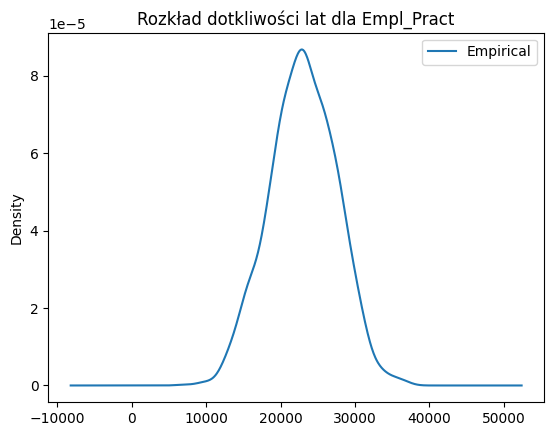

≈örednia dla Execut_Del: 3000.02
Odchylenie standardowe dla Execut_Del: 3033.54
Dopasowany rozk≈Çad dla Execut_Del: expon


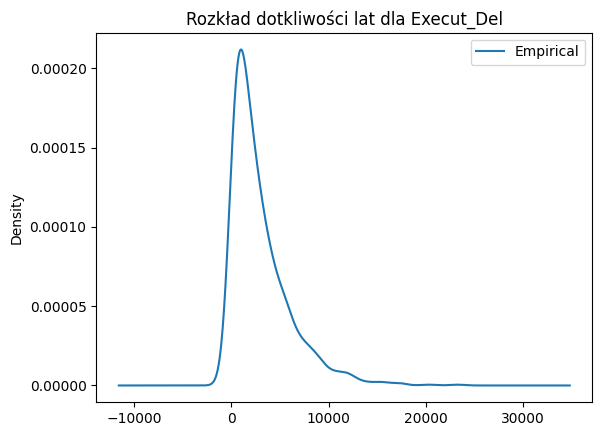

≈örednia dla External_Fr: 5000.00
Odchylenie standardowe dla External_Fr: 965.86
Dopasowany rozk≈Çad dla External_Fr: loggamma


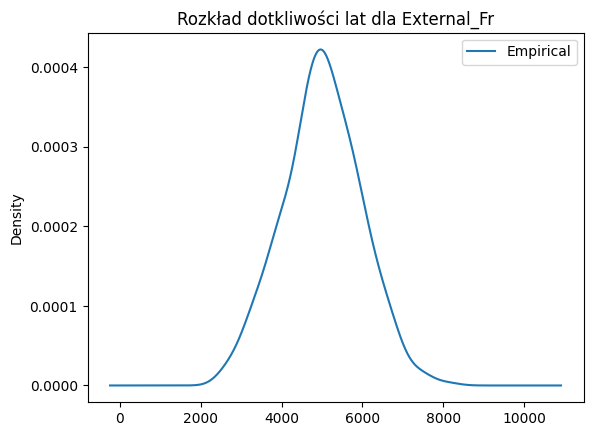

≈örednia dla Internal_Fr: 3002.07
Odchylenie standardowe dla Internal_Fr: 25953.40
Dopasowany rozk≈Çad dla Internal_Fr: pareto


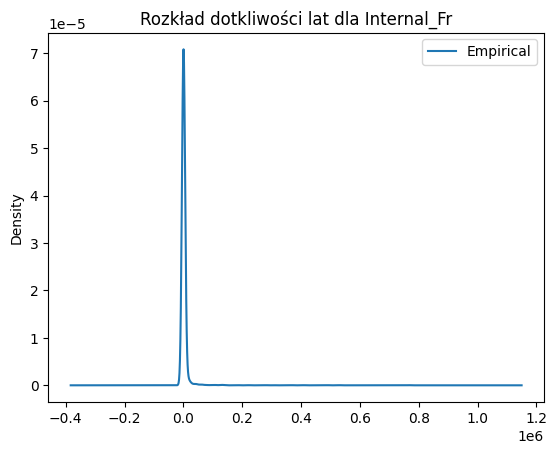

In [51]:
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]

    print("≈örednia dla {}: {:.2f}".format(linia,linia_data['strata'].mean()))
    print("Odchylenie standardowe dla {}: {:.2f}".format(linia,linia_data['strata'].std()))
    dfitplot = distfit()
    dfitplot.fit_transform(linia_data['strata'], verbose=False)
    distr = dfitplot.model
    print("Dopasowany rozk≈Çad dla {}: {}".format(linia,distr['name'])) 

    linia_data['strata'].plot(kind='kde', title=f'Rozk≈Çad dotkliwo≈õci lat dla {linia}',
                    xlabel='Liczba', ylabel='Strata', label="Empirical")
    plt.legend()
    plt.show()   


In [52]:
strata_distributions = {}
freq_distributions = {}

dfit_strata = distfit(distr=opcje)
dfit_freq = distfit(method="discrete", distr=["binom", "nbinom", "poisson"])

for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    
    dfit_strata.fit_transform(linia_data['strata'], verbose=False)
    distr_strata = dfit_strata.model['model']
    strata_distributions[linia]=(distr_strata)

    year_counts = linia_data['rok'].value_counts().sort_index()
    dfit_freq.fit_transform(year_counts, verbose=False)
    distr_freq = dfit_freq.model['model']
    freq_distributions[linia]=(distr_freq)

In [56]:
# scenariusze = pd.DataFrame(columns=['opVAR', 'opES'])
# m = 10
# n = 10
# for i in tqdm(range(m)):
#         straty = []
#         for j in tqdm(range(n)):
#             strata = 0
#             for linia in np.unique(data['linia']):
#                 freq = (round(freq_distributions[linia].rvs()) if freq_distributions[linia].rvs() > 0 else 0)
#                 for k in range(freq):
#                     strata += (strata_distributions[linia].rvs() if strata_distributions[linia].rvs() > 0 else 0)
#             straty.append(strata)
#         opVAR = np.percentile(straty, 99.9)
#         opES = np.mean([x for x in straty if x > opVAR])
#         scenariusze = scenariusze.append({'opVAR': opVAR, 'opES': opES}, ignore_index=True)
# print(scenariusze['opVAR'].values)
# print(scenariusze['opES'].values)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:05<00:00,  1.93it/s]

[485895701718.7482 68211816.58740424 8675015.855885414 6787980.03699378
 40768917.4943858 20221653.29508457 6581365.179436831 94756198158.55658
 77834025.10882398 274063301.7340625]
[489988810453.6837 68729992.46556512 8713026.770019345 6800958.048102978
 41071688.10297749 20321015.624196555 6584763.875161443 95616628320.03998
 78442336.03061469 275667857.72049195]


In [58]:
opVars = []
opES = []
m = 10
n = 10
for i in tqdm(range(m)):
    straty = np.zeros(n)
    for j in tqdm(range(n)):
        strata = 0
        for linia in np.unique(data['linia']):
            freq = round(freq_distributions[linia].rvs()) if freq_distributions[linia].rvs() > 0 else 0
            for k in range(freq):
                strata += strata_distributions[linia].rvs() if strata_distributions[linia].rvs() > 0 else 0
        straty[j] = strata
    opVars.append(np.percentile(straty, 99.9))
    opES.append(np.mean([x for x in straty if x > opVars[-1]]))
    
print(opVars)
print(opES)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 10/10 [00:04<00:00,  2.39it/s]

[60072065.787217885, 8635312.336961433, 220291295.5478495, 26278546787.745117, 16102575.459806861, 542840850.6020839, 14701690.450085673, 19615191.81308556, 74948787.47767836, 16679704.267337007]
[60236155.24804291, 8679476.35000502, 221337618.2470871, 26516877757.51467, 16178868.346017733, 547609767.2966406, 14774592.238205805, 19762189.53197105, 75605017.85911046, 16756477.000285383]


In [59]:
# print(scenariusze['opVAR'])
# print(np.mean(scenariusze['opVAR'].values))

dla czƒôsto≈õci - rozk≈Çady Poissona, dwumianowy i ujemny dwumianowy
por√≥wnanie ≈õredniej i wariancji z pr√≥by.
- ùê∏ùëã > ùê∑2ùëã rozk≈Çad dwumianowy
- ùê∏ùëã = ùê∑2ùëã rozk≈Çad Poissona
- ùê∏ùëã < ùê∑2ùëã rozk≈Çad ujemny dwumianowy

Je≈õli klasyczne metody zawodzƒÖ, to zawsze mo≈ºemy szukaƒá
innych rozk≈Çad√≥w teoretycznych.
Np.
¬ª rozk≈Çad geometryczny
¬ª rozk≈Çad Pascala
¬ª rozk≈Çad hipergeometryczny

W praktyce banki u≈ºywajƒÖ r√≥≈ºnych rozk≈Çad√≥w, kt√≥re majƒÖ
modelowaƒá dotkliwo≈õƒá strat. Mo≈ºna spotkaƒá siƒô z:
‚Ä¢ rozk≈Çadem logarytmiczno-normalnym,
‚Ä¢ rozk≈Çadem wyk≈Çadniczym,
‚Ä¢ rozk≈Çadem Weibulla,
‚Ä¢ rozk≈Çadem Pareto,
‚Ä¢ rozk≈Çadem warto≈õci ekstremalnych itp.

SƒÖ trzy g≈Ç√≥wne testy dopasowania danych empirycznych
do rozk≈Çad√≥w teoretycznych:
- test chi-kwadrat Pearsona,
- test Ko≈Çmogorowa-Smirnowa (Lilieforsa),
- test Andersona-Darlinga.
¬ª W ka≈ºdym przypadku hipotezy majƒÖ postaƒá: H0: dane mogƒÖ
byƒá opisane rozk≈Çadem ‚Ä¶ przy H1: dane nie mogƒÖ byƒá ‚Ä¶

dla ka≈ºdej linii: 
ile jest wydarze≈Ñ dla ka≈ºdego roku - na tej podstawie wyznaczyƒá rozk≈Çad czƒôsto≈õci, na jego podstawie przypisaƒá rozk≈Çad teoretyczny (wydarzenia/rok) i z niego wylosowaƒá scenariusz liczby zdarze≈Ñ
jaka jest dotkliwo≈õƒá og√≥≈Çem (?), wyznaczyƒá rozk≈Çad, na jego podstawie przypisaƒá rozk≈Çad teoretyczny itd. analogicznie jak wy≈ºej